In [ ]:
#hide
import os

if os.getcwd().endswith('nbs'):
    os.chdir("..")
os.getcwd()

'/home/diogoneves/Projects/metaphora/DataImporters'

# Dataset Stats

> Useful stats about our data.

In [ ]:
#hide

from DataImporters.dataset import DatasetPaths

import os
import pandas as pd
import librosa as lr
import matplotlib.pyplot as plt
%matplotlib inline

DATA_DIR = "data"
DATASET_NAME = "small_balanced"
PATHS = DatasetPaths(DATA_DIR, DATASET_NAME)
PATHS

{'annotation_path': None,
 'audio_output_path': 'data/small_balanced/audio/',
 'data_path': 'data',
 'dataset_name': 'small_balanced',
 'intermediate_path': 'data/intermediate/',
 'metadata_output_path': 'data/small_balanced/metadata.csv',
 'output_path': 'data/small_balanced'}

In [ ]:
#hide

metadata = pd.read_csv(PATHS.metadata_output_path)

## Let's look into the sources

First let's see how many rows we have in total:

In [ ]:
#hide_input
row_count = metadata.shape[0]
row_count

284

In [ ]:
#hide

# Add a column with the audio length in seconds
metadata['length'] = metadata['filename'].apply(lambda x: lr.core.get_duration(filename=PATHS.audio_output_path + x))

Let's look at the distribution of sources.

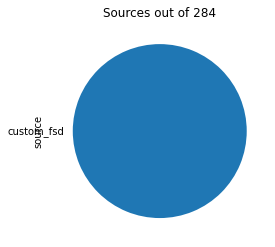

In [ ]:
#hide_input

metadata["source"].value_counts().plot(kind="pie", title='Sources out of ' + str(row_count))
plt.gcf().set_facecolor("white")

More importantly, what's the distribution of each high-level category and how much they contribute in audio length.

<AxesSubplot:title={'center':'Audio Length per Category'}, ylabel='length'>

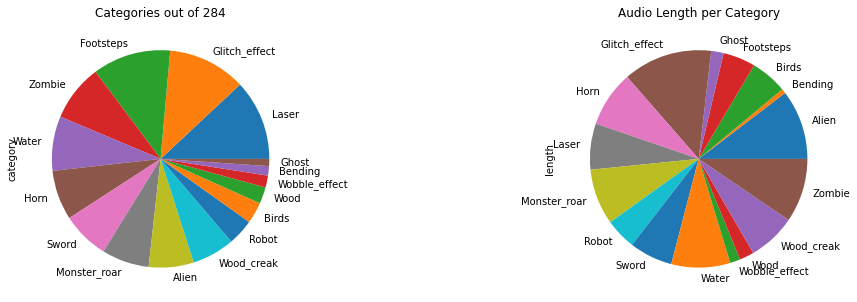

In [ ]:
#hide_input

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.8)
plt.gcf().set_facecolor("white")

plt.subplot(1, 2, 1)
metadata["category"].value_counts().plot(kind='pie', title='Categories out of ' + str(row_count))
plt.subplot(1, 2, 2)
metadata.groupby("category")["length"].sum().plot(kind="pie", title='Audio Length per Category')

<AxesSubplot:title={'center':'Length of audio (in seconds)'}, ylabel='Frequency'>

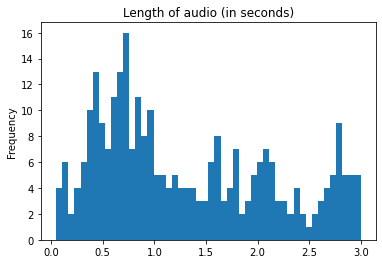

In [ ]:
#hide_input

metadata["length"].plot(kind="hist", bins=50, title='Length of audio (in seconds)')

Looks like we have some very short audio files, let's have a look.

In [ ]:
#hide

from IPython.display import display, Audio
import librosa as lr

how_many = 3

In [ ]:
#hide_input

shortest_rows = metadata.loc[metadata['length'].sort_values(ascending=True).index].head(how_many)
shortest_rows

,filename,category,label,extra,source,version,length
198,cd4b4baa71b81e49.wav,Laser,"Hit,Laser,Space,Shot",NaN,custom_fsd,16,0.048617
194,f8dddaa4a29308a4.wav,Laser,"Action,Attack,Fire,Firing,Gun,Nostalgia,Nostal...",NaN,custom_fsd,16,0.080703
214,1a029d148c24caf8.wav,Bending,"Beep,Bleep,Blip,Button,Casino,Click,Push",NaN,custom_fsd,16,0.089887


In [ ]:
#hide

# for filename in shortest_rows["filename"].to_list():
#     audio_data, sample_rate = lr.load(AUDIO_PATH + filename)
#     display(Audio(audio_data, rate=sample_rate))

And some very long ones too!

In [ ]:
#hide_input

longest_rows = metadata.loc[metadata['length'].sort_values(ascending=False).index].head(how_many)
longest_rows

,filename,category,label,extra,source,version,length
250,fc61ce2346e5bdba.wav,Birds,"Crow,Raven",NaN,custom_fsd,16,2.998163
140,809979a6f3c15cac.wav,Alien,"Effect,Fx,Processed",NaN,custom_fsd,16,2.989728
246,e27fff226c5486b8.wav,Birds,"Birdsong,Call,Craw,Crow,Crows",NaN,custom_fsd,16,2.974083


In [ ]:
#hide

# for filename in longest_rows["filename"].to_list():
#     audio_data, sample_rate = lr.load(AUDIO_PATH + filename)
#     display(Audio(audio_data, rate=sample_rate))

## Let's look into our labels

Now let's investigate how many labels are defined per audio file.

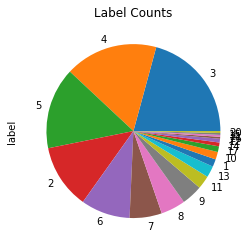

In [ ]:
#hide_input

metadata["label"].str.split(",").apply(len).value_counts().plot(kind='pie', title='Label Counts')
plt.gcf().set_facecolor("white")

Next we look at the occurrences for each individual label, both the top and bottom.  

Ideally our data covers sufficient labels, but doesn't treat every row as a different type. We seem to be doing well there.  
This means we want to have as many different types of labels as possible, while minimising the number of single occurrence labels.  

<AxesSubplot:title={'center':'Bottom 10 Labels'}>

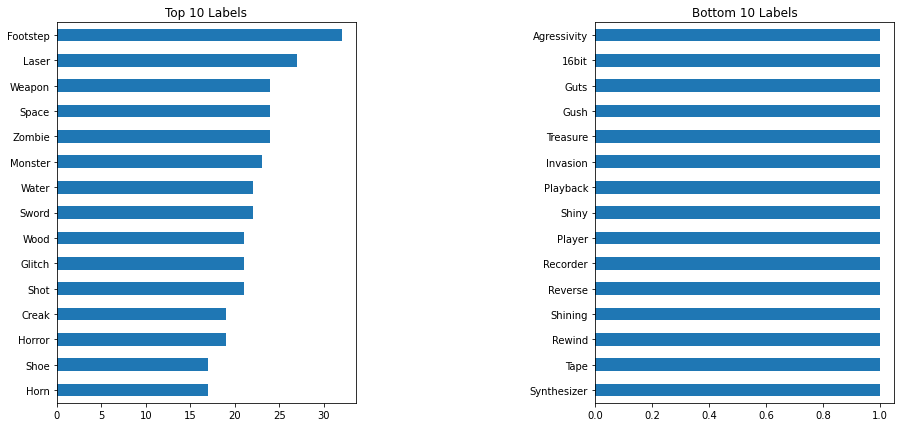

In [ ]:
#hide_input

how_many = 15
label_occurrences = metadata["label"].str.split(",").apply(pd.Series, 1).stack().value_counts().sort_values()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, how_many // 2))
fig.subplots_adjust(wspace=0.8)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))

plt.subplot(1, 2, 1)
label_occurrences[-how_many:].plot(kind='barh', title='Top 10 Labels')
plt.subplot(1, 2, 2)
label_occurrences[:how_many].plot(kind='barh', title='Bottom 10 Labels')


We have a bunch of single occurrence labels, let's count them.

In [ ]:
#collapse

sum(metadata["label"].str.split(",").apply(len) == 1)

4

Let's look at some of those rows with single labels.

In [ ]:
#hide_input

metadata.loc[metadata["label"].str.split(",").apply(len) == 1].head(15)

,filename,category,label,extra,source,version,length
182,dd3e38ff97ecc5e8.wav,Glitch_effect,Glitch,NaN,custom_fsd,16,1.754558
247,80ca6bea512f0c49.wav,Birds,Rooster,NaN,custom_fsd,16,2.737896
258,7bec00a36a5f4a83.wav,Wood_creak,Creak,NaN,custom_fsd,16,1.124646
263,bb98523f3249b1bc.wav,Alien,Spring,NaN,custom_fsd,16,2.093832
